In [16]:
pip install wordcloud plotly seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [8]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [30]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [32]:
print('Anime: ', anime.shape)
print('Rating: ', rating.shape)

Anime:  (12294, 7)
Rating:  (7813737, 3)


In [36]:
print('Anime: ')
print(anime.info())

print('\nRating: ')
print(rating.info())

Anime: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

Rating: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [40]:
#Remove unrated anime
rating = rating[rating['rating'] != -1]

print('Rating: \n', rating.shape)

Rating: 
 (6337241, 3)


In [42]:
print('Anime: \n', anime.isnull().sum())

Anime: 
 anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [56]:
# Drop all the null values in the rating column
anime = anime.drop(list(anime.loc[anime['rating'].isnull() == True].index), axis=0)
# Fill in the remain null values with "Unknown" 
anime = anime.fillna('Unknown')

anime = anime.reset_index(drop=True)
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [84]:
ds = {
    'Anime Rating Mean': anime['rating'].mean(), 
    'Anime Rating Median': anime['rating'].median(),
    'Anime Rating Mode': anime['rating'].mode().iloc[0],
    'Anime Rating Variance': anime['rating'].var(),
    'Anime Rating Standard Deviation': anime['rating'].std(),
    'Anime Rating Skewness': anime['rating'].skew(),
    'Anime Rating Kurtosis': anime['rating'].kurt(),

    'Anime Members Mean': anime['members'].mean(), 
    'Anime Members Median': anime['members'].median(),
    'Anime Members Mode': anime['members'].mode().iloc[0],
    'Anime Members Variance': anime['members'].var(),
    'Anime Members Standard Deviation': anime['members'].std(),
    'Anime Members Skewness': anime['members'].skew(),
    'Anime Members Kurtosis': anime['members'].kurt(),

    'User Rating Mean': rating['rating'].mean(), 
    'User Rating Median': rating['rating'].median(),
    'User Rating Mode': rating['rating'].mode().iloc[0],
    'User Rating Variance': rating['rating'].var(),
    'User Rating Standard Deviation': rating['rating'].std(),
    'User Rating Skewness': rating['rating'].skew(),
    'User Rating Kurtosis': rating['rating'].kurt()
}
# Group 1: Anime Rating Stats
print("📊 Anime Rating Stats")
print("----------------------")
print(f"Mean: {anime['rating'].mean()}")
print(f"Median: {anime['rating'].median()}")
print(f"Mode: {anime['rating'].mode().iloc[0]}")
print(f"Variance: {anime['rating'].var()}")
print(f"Standard Deviation: {anime['rating'].std()}")
print(f"Skewness: {anime['rating'].skew()}")
print(f"Kurtosis: {anime['rating'].kurt()}")
print()  # <- blank line between groups

# Group 2: Anime Members Stats
print("👥 Anime Members Stats")
print("----------------------")
print(f"Mean: {anime['members'].mean()}")
print(f"Median: {anime['members'].median()}")
print(f"Mode: {anime['members'].mode().iloc[0]}")
print(f"Variance: {anime['members'].var()}")
print(f"Standard Deviation: {anime['members'].std()}")
print(f"Skewness: {anime['members'].skew()}")
print(f"Kurtosis: {anime['members'].kurt()}")
print()  # <- blank line between groups

# Group 3: User Rating Stats
print("🧑 User Rating Stats")
print("----------------------")
print(f"Mean: {rating['rating'].mean()}")
print(f"Median: {rating['rating'].median()}")
print(f"Mode: {rating['rating'].mode().iloc[0]}")
print(f"Variance: {rating['rating'].var()}")
print(f"Standard Deviation: {rating['rating'].std()}")
print(f"Skewness: {rating['rating'].skew()}")
print(f"Kurtosis: {rating['rating'].kurt()}")

📊 Anime Rating Stats
----------------------
Mean: 6.473901690981432
Median: 6.57
Mode: 6.0
Variance: 1.054207978728805
Standard Deviation: 1.0267463068980598
Skewness: -0.5435700688578504
Kurtosis: 0.5075295934193371

👥 Anime Members Stats
----------------------
Mean: 18279.52403846154
Median: 1539.0
Mode: 60
Variance: 3055412322.175838
Standard Deviation: 55275.7842294059
Skewness: 6.630532490249099
Kurtosis: 61.8240015512786

🧑 User Rating Stats
----------------------
Mean: 7.808496946857473
Median: 8.0
Mode: 8
Variance: 2.47274376600272
Standard Deviation: 1.572496030520497
Skewness: -0.760235526973351
Kurtosis: 1.0210061837642597


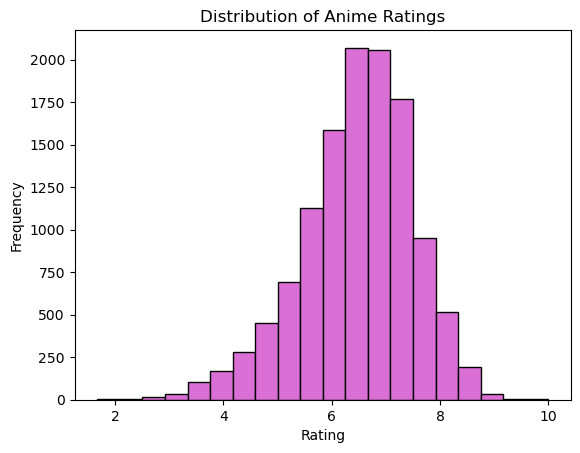

In [86]:
plt.hist(anime['rating'].dropna(), bins=20, color='orchid', edgecolor='black')
plt.title("Distribution of Anime Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

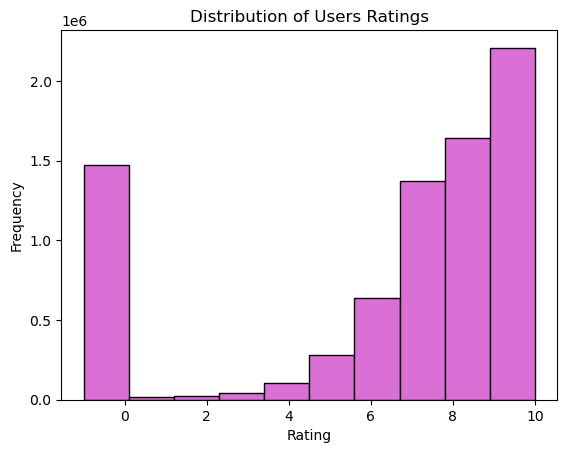

In [10]:
plt.hist(rating['rating'].dropna(), bins=10, color='orchid', edgecolor='black')
plt.title("Distribution of Users Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

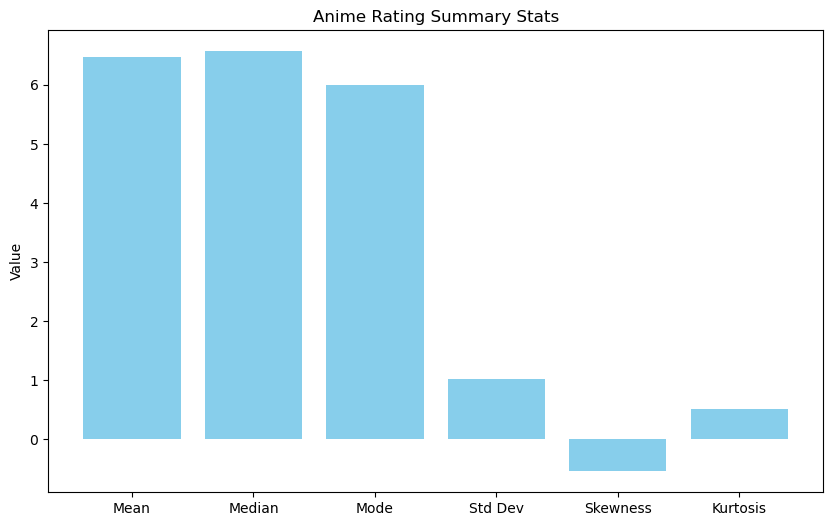

In [92]:
labels = ['Mean', 'Median', 'Mode', 'Std Dev', 'Skewness', 'Kurtosis']
anime_rating_stats = [
    anime['rating'].mean(), anime['rating'].median(),
    anime['rating'].mode().iloc[0], anime['rating'].std(),
    anime['rating'].skew(), anime['rating'].kurt()
]

plt.figure(figsize=(10,6))
plt.bar(labels, anime_rating_stats, color='skyblue')
plt.title('Anime Rating Summary Stats')
plt.ylabel('Value')
plt.show()

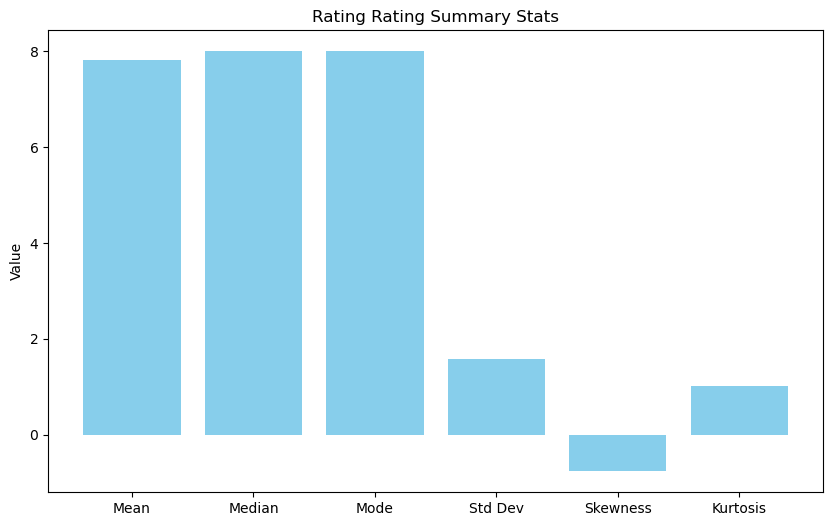

In [146]:
labels = ['Mean', 'Median', 'Mode', 'Std Dev', 'Skewness', 'Kurtosis']
anime_rating_stats = [
    rating['rating'].mean(), rating['rating'].median(),
    rating['rating'].mode().iloc[0], rating['rating'].std(),
    rating['rating'].skew(), rating['rating'].kurt()
]

plt.figure(figsize=(10,6))
plt.bar(labels, anime_rating_stats, color='skyblue')
plt.title('Rating Rating Summary Stats')
plt.ylabel('Value')
plt.show()

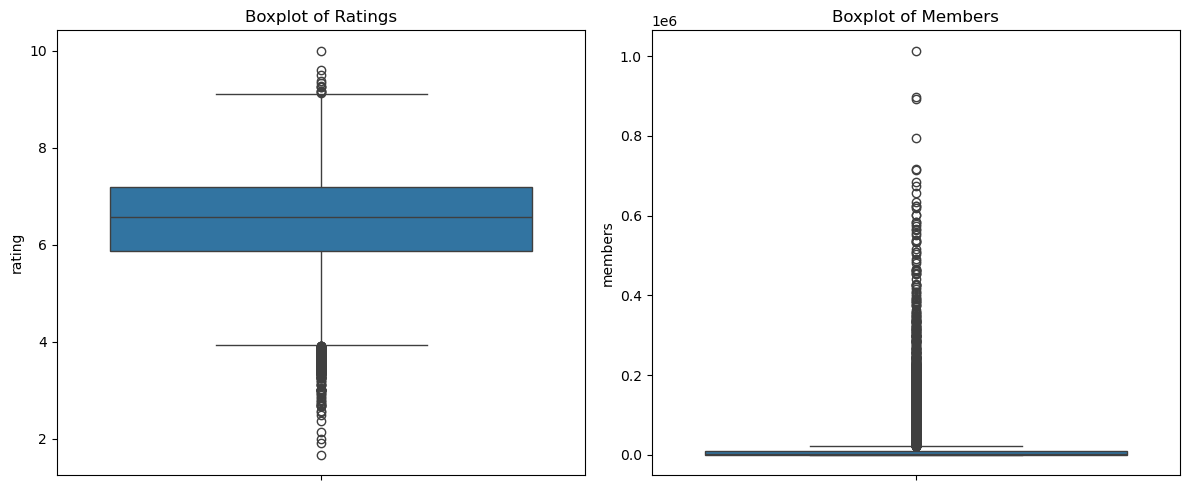

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=anime['rating'], ax=axes[0])
axes[0].set_title("Boxplot of Ratings")

sns.boxplot(y=anime['members'], ax=axes[1])
axes[1].set_title("Boxplot of Members")

plt.tight_layout()
plt.show()

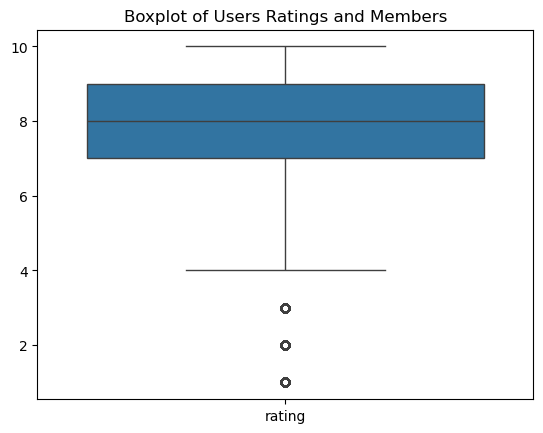

In [100]:
sns.boxplot(data=rating[['rating']])
plt.title("Boxplot of Users Ratings and Members")
plt.show()

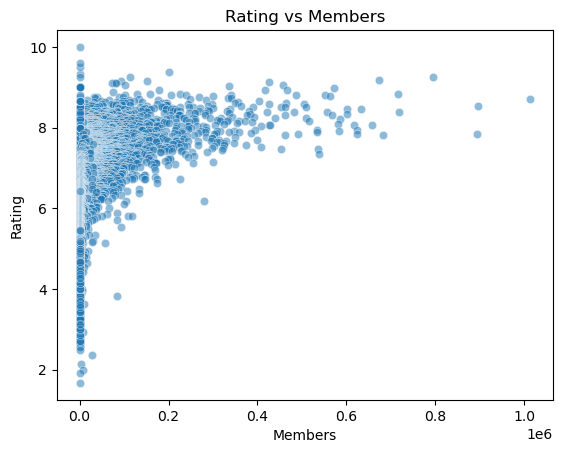

In [104]:
sns.scatterplot(x='members', y='rating', data=anime, alpha=0.5)
plt.title("Rating vs Members")
plt.xlabel("Members")
plt.ylabel("Rating")
plt.show()

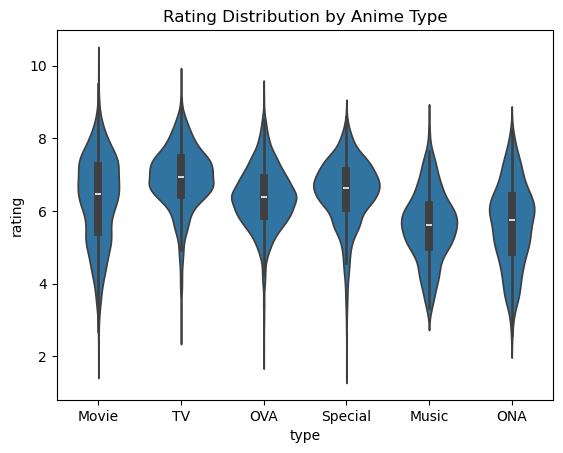

In [106]:
sns.violinplot(x='type', y='rating', data=anime)
plt.title("Rating Distribution by Anime Type")
plt.show()

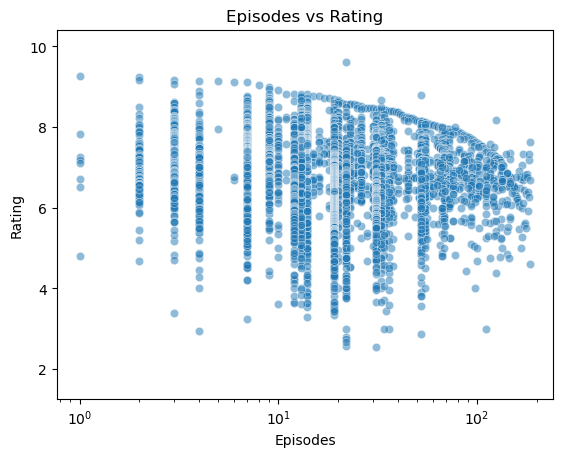

In [108]:
sns.scatterplot(x='episodes', y='rating', data=anime, alpha=0.5)
plt.title("Episodes vs Rating")
plt.xlabel("Episodes")
plt.ylabel("Rating")
plt.xscale('log')  # optional: handle huge episode counts better
plt.show()

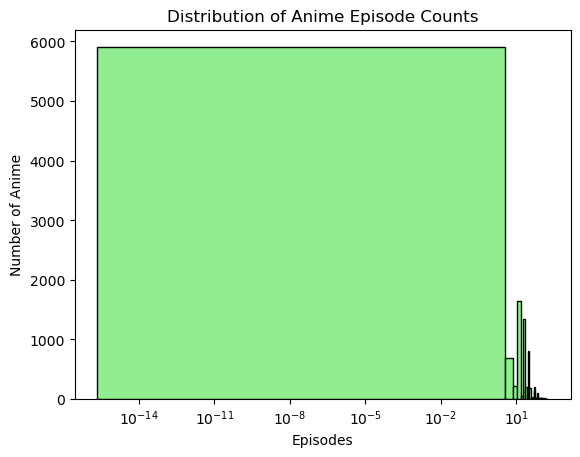

In [110]:
plt.hist(anime['episodes'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of Anime Episode Counts")
plt.xlabel("Episodes")
plt.ylabel("Number of Anime")
plt.xscale('log')  # if episode count range is large
plt.show()

In [118]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

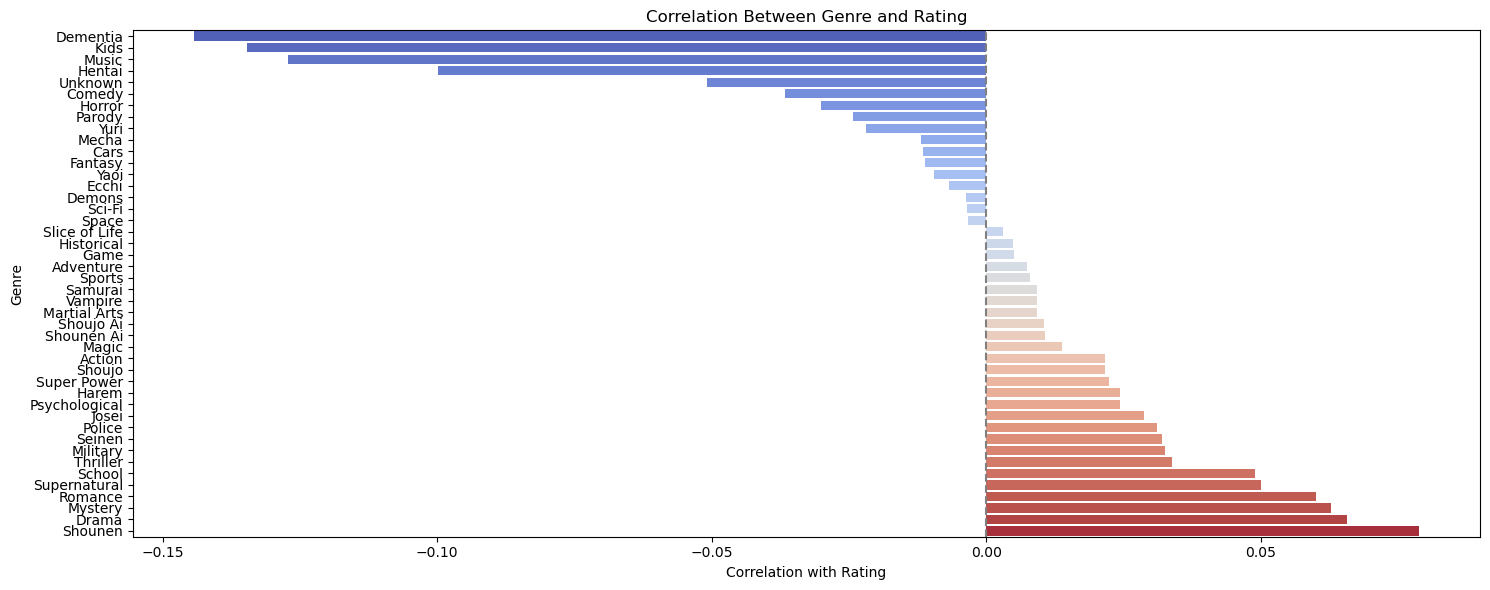

In [138]:
# Drop missing genres or ratings
anime_clean = anime.dropna(subset=['genre', 'rating'])

# Split genre into list
anime_clean['genre_list'] = anime_clean['genre'].str.split(', ')

# Explode so each genre is in its own row
anime_exploded = anime_clean.explode('genre_list')

# One-hot encode the genres
genre_dummies = pd.get_dummies(anime_exploded['genre_list'])

# Concatenate the dummy columns with the ratings
genre_rating_df = pd.concat([anime_exploded[['rating']], genre_dummies], axis=1)

# Calculate correlation of each genre with rating
genre_corr = genre_rating_df.corr()['rating'].drop('rating').sort_values()

# Plot
plt.figure(figsize=(15,6))
sns.barplot(x=genre_corr.values, y=genre_corr.index, hue=genre_corr.index, palette='coolwarm', legend=False)
plt.title('Correlation Between Genre and Rating')
plt.xlabel('Correlation with Rating')
plt.ylabel('Genre')
plt.axvline(0, color='gray', linestyle='--')  # neutral line
plt.tight_layout()
plt.show()

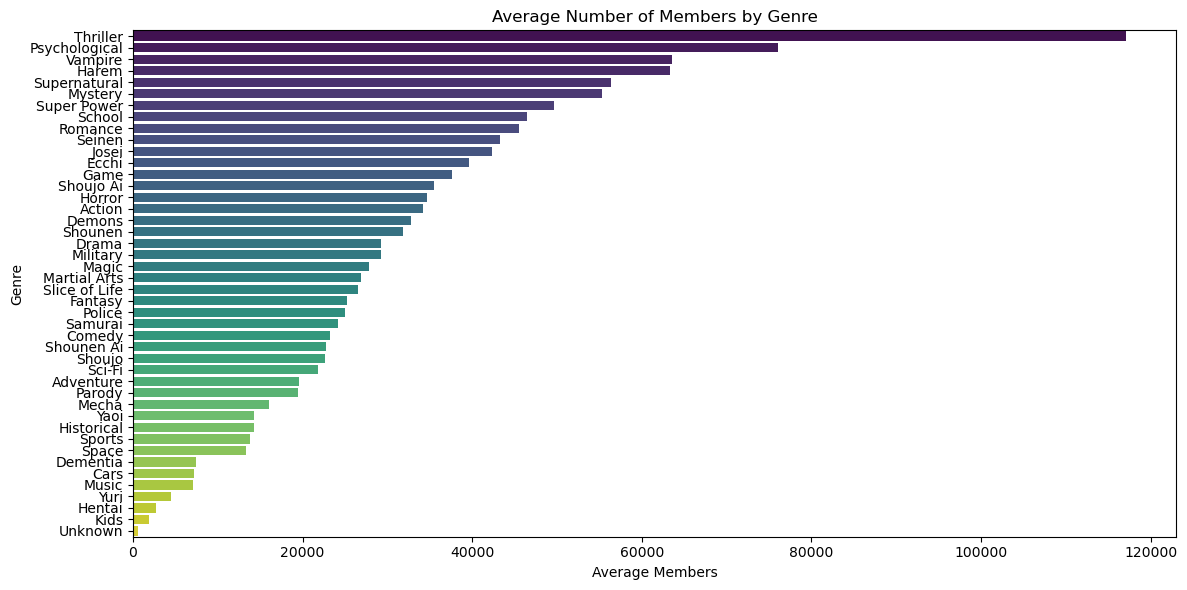

In [144]:
# Clean data: drop NaN in genre or members
anime_clean = anime.dropna(subset=['genre', 'members'])

# Split genres and explode
anime_clean['genre_list'] = anime_clean['genre'].str.split(', ')
anime_exploded = anime_clean.explode('genre_list')

# Group by genre and calculate mean members
genre_members = anime_exploded.groupby('genre_list')['members'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_members.values, y=genre_members.index, hue=genre_members.index, palette='viridis', legend=False)
plt.title("Average Number of Members by Genre")
plt.xlabel("Average Members")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [148]:
#Reduce the dataset size by sampling

sampled_data = rating['user_id'].drop_duplicates().sample(n=1000, random_state=40).values

filtered = rating[rating['user_id'].isin(sampled_data)]

In [154]:
# Convert to the Matrix Format

user_id = {user: id for id, user in enumerate(filtered['user_id'].unique())}
anime_id = {anime: id for id, anime in enumerate(filtered['anime_id'].unique())}

rows = filtered['user_id'].map(user_id).astype(np.int64).values
columns = filtered['anime_id'].map(anime_id).astype(np.int64).values
data = filtered['rating'].astype(np.float64).values


sparse_matrix = csr_matrix((data, (rows, columns)))

In [156]:
# Train the KNN Model

knn = NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=15)
knn.fit(sparse_matrix.tocsr())

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=15)

In [158]:
# Randome Users

random_user = np.random.randint(0, sparse_matrix.shape[0])
user_vector = sparse_matrix.getrow(random_user).toarray().reshape(1, -1)




In [162]:
# Find Similar Users

distances, indices = knn.kneighbors(user_vector, n_neighbors=15)
similar_users =  indices.flatten()

In [164]:
# Content by Similar Users

random_user_id = list(user_id.keys())[random_user]
user_anime = set(filtered[filtered['user_id']== random_user_id]['anime_id'])

In [174]:
recommendation = set( )

for user in similar_users:
    similar_users_id = list(user_id.keys())[user]
    recommendation.update(filtered[filtered['user_id']== similar_users_id]['anime_id'].values)


recommendation.difference_update(user_anime)

In [178]:
# Fetch and Display Result

recommendation_names = anime[anime['anime_id'].isin(recommendation)]['name'].head(15).tolist()
print('Anime Recommendations: ')
for i, anime in enumerate(recommendation_names):
    print(f'{i}. {anime}')

Anime Recommendations: 
0. Fullmetal Alchemist: Brotherhood
1. Steins;Gate
2. Gintama&#039;
3. Hunter x Hunter (2011)
4. Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
5. Gintama&#039;: Enchousen
6. Clannad: After Story
7. Gintama
8. Code Geass: Hangyaku no Lelouch R2
9. Sen to Chihiro no Kamikakushi
10. Mushishi Zoku Shou 2nd Season
11. Code Geass: Hangyaku no Lelouch
12. Cowboy Bebop
13. One Punch Man
14. Mononoke Hime
